# This notebook will be used to create all the graphs for the report

In [1]:
# imports
import pandas as pd
from river_class import river_obj
from undershot_calcs import underTurbine
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')

# concatenate testDataMore.csv to testData.csv
data_df = pd.concat([data_df, pd.read_csv('Test Data/testDataMore.csv')])

# remove nan values
data_df = data_df.dropna()



data_df


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9


In [3]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity, head=0.5)

# create a breastshot turbine object - with values from data sheet
breast_turbine = breastTurbine(river)




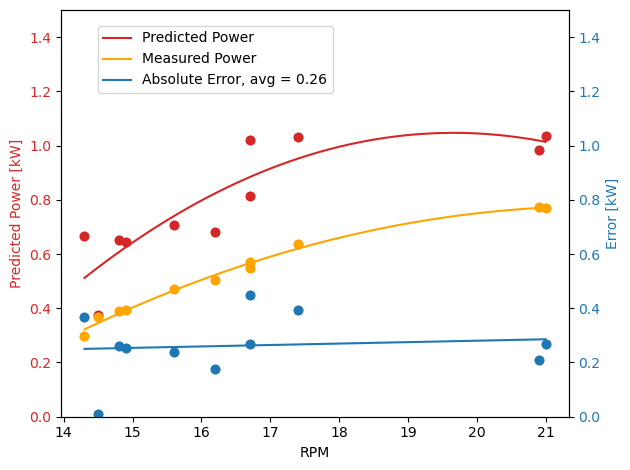

In [4]:
# plot power vs RPM on one axis and error vs RPM on the other axis



# order the data by RPM
data_df = data_df.sort_values(by=['Turbine rotational speed [RPM]'])

# create a list of power outputs
power_list = []
error_list = []

# iterate through the data and calculate the power output
for index, row in data_df.iterrows():

    # get the turbine rotational speed
    turbine_rot_speed = row['Turbine rotational speed [RPM]']

    # get the turbine horizontal offset
    turbine_horiz_offset = row['x centre [m]']

    # get the turbine vertical offset
    turbine_vert_offset = row['y centre [m]']

    # re initialise the breastshot turbine object
    breast_turbine.__init__(river, RPM=turbine_rot_speed, x_centre=turbine_horiz_offset, y_centre=turbine_vert_offset)

    # calculate the power output
    power = breast_turbine.analysis()/1000

    # calculate the error
    error = abs(power - row['Output power [kW]']) 

    # add the power and error to the lists
    power_list.append(power)
    error_list.append(error)    

# plot power vs RPM on one axis and error vs RPM on the other axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('RPM')
ax1.set_ylabel('Predicted Power [kW]', color=color)
ax1.plot(data_df['Turbine rotational speed [RPM]'], power_list,'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 'o',color='orange')

# plot line of best fit for prediction and actual
z = np.polyfit(data_df['Turbine rotational speed [RPM]'], power_list, 2)
# plot the line of best fit on more points
x_new = np.linspace(data_df['Turbine rotational speed [RPM]'].min(), data_df['Turbine rotational speed [RPM]'].max(), 50)
y_new = np.polyval(z, x_new)
ax1.plot(x_new, y_new, color=color, label='Predicted Power')


z = np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 2)
# plot the line of best fit on more points
x_new = np.linspace(data_df['Turbine rotational speed [RPM]'].min(), data_df['Turbine rotational speed [RPM]'].max(), 50)
y_new = np.polyval(z, x_new)
ax1.plot(x_new, y_new, color='orange', label='Measured Power')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Error [kW]', color=color)  # we already handled the x-label with ax1
ax2.plot(data_df['Turbine rotational speed [RPM]'], error_list,'o' ,color=color)

# plot line of best fit for error
z = np.polyfit(data_df['Turbine rotational speed [RPM]'], error_list, 1)
p = np.poly1d(z)
ax2.plot(data_df['Turbine rotational speed [RPM]'],p(data_df['Turbine rotational speed [RPM]']),color=color, label='Absolute Error, avg = %.2f' % np.mean(error_list))


ax2.tick_params(axis='y', labelcolor=color)

# limit the y axis to 0 to 1.5
ax1.set_ylim(0, 1.5)
ax2.set_ylim(0, 1.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# put legent in bottom right inside plot
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.show()




this shows that the model accurately can reflect the trends seen in the test data for installation locations and RPM pairings.

Now sensitivity analysis can be conducted with the trends represented fairly.

# Sensitivity Analysis

In [5]:
# sensitivity analysis for flow velocity at a constant RPM (assuming sufficient water flow rate)

# initialise an undershot turbine
undershot_turbine = underTurbine(river)

# Breastshot turbine
# create a list of power outputs
bpower_list = []
upower_list = []
error_list = []

# create a list of velocities
velocity_list = np.linspace(1, 10, 20)

# iterate through the data and calculate the power output
for velocity in velocity_list:

    # re initialise the river object
    river.__init__(r_width, r_depth, velocity, head=2)

    # re initialise the breastshot turbine object
    breast_turbine.__init__(river, RPM=20)

    # re initialise the undershot turbine object
    undershot_turbine.__init__(river, RPM=20, y_centre=0.2)

    # optimise the turbine position
    bpower = breast_turbine.optimise()/1000

    # optimise the turbine position
    upower = undershot_turbine.analysis()/1000

    # add the power and error to the lists
    bpower_list.append(bpower)
    upower_list.append(upower)



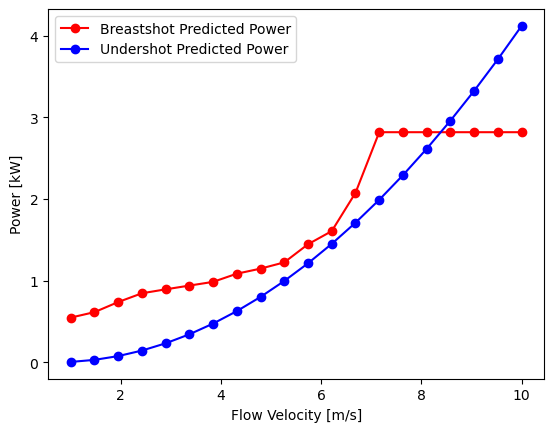

In [6]:
# plot the power vs velocity for breastshot and undershot turbines
plt.plot(velocity_list, bpower_list, 'o-', label='Breastshot Predicted Power', color='red')
plt.plot(velocity_list, upower_list, 'o-', label='Undershot Predicted Power', color='blue')
plt.xlabel('Flow Velocity [m/s]')
plt.ylabel('Power [kW]')
plt.legend()
plt.show()




In [ ]:
# position sensitivity analysis for breastshot turbine and undershot turbine

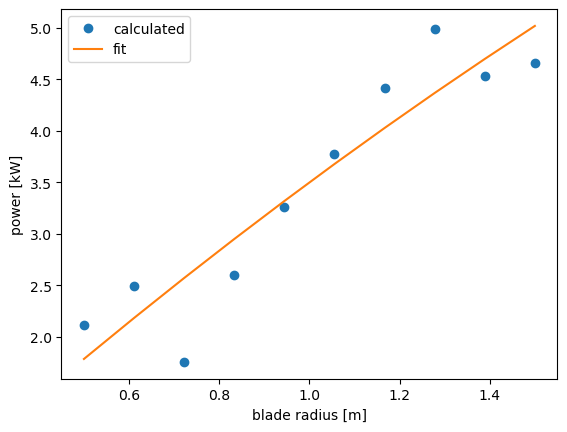

In [7]:
# blade radius vs power

# create a list of blade radii
radii = np.linspace(0.5, 1.5, 10)

# create a list of power values
power = []

# loop through the radii and calculate the power for each
for radius in radii:
    breast_turbine.__init__(river, radius=radius)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs blade radius
plt.figure()
plt.plot(radii, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(radii), np.poly1d(np.polyfit(radii, power, 2))(np.unique(radii)), label='fit')

plt.xlabel('blade radius [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


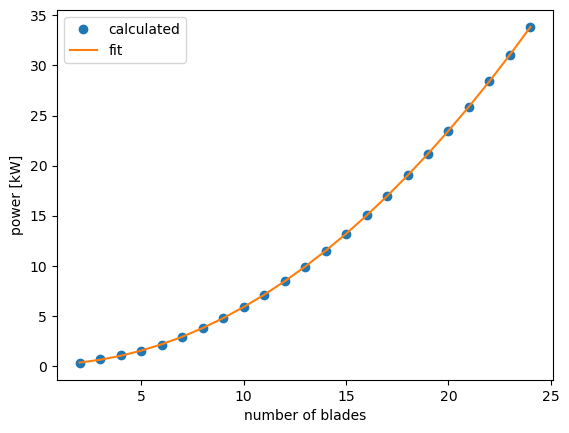

In [8]:
# number of blades sensitivity analysis

# create a list of number of blades
blades = range(2, 25)

# create a list of power values
power = []

# loop through the number of blades and calculate the power for each
for blade in blades:
    breast_turbine.__init__(river, num_blades=blade)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs number of blades
plt.figure()
plt.plot(blades, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(blades), np.poly1d(np.polyfit(blades, power, 2))(np.unique(blades)), label='fit')

plt.xlabel('number of blades')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

This trend is not entirely accurate as the effect of blade blocking is not accounted for by the mathematical model. For greater accuracy a blade blocking component will need to be introduced to the model.

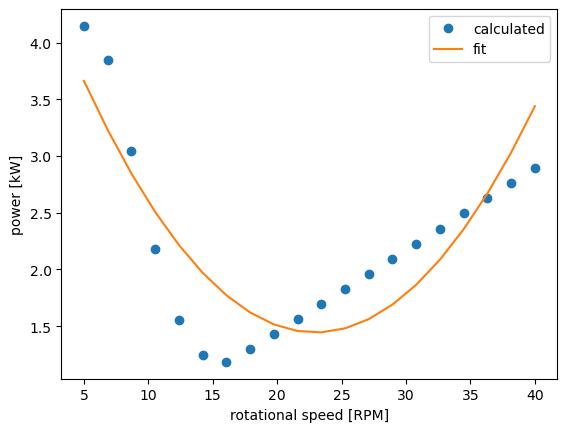

In [9]:
# rotational speed sensitivity analysis

# create a list of rotational speeds
speeds = np.linspace(5, 40, 20)

# create a list of power values
power = []

# loop through the rotational speeds and calculate the power for each
for speed in speeds:
    breast_turbine.__init__(river, RPM=speed, num_blades=6, x_centre=1, y_centre=-0.1)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs rotational speed
plt.figure()
plt.plot(speeds, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(speeds), np.poly1d(np.polyfit(speeds, power, 2))(np.unique(speeds)), label='fit')

plt.xlabel('rotational speed [RPM]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()





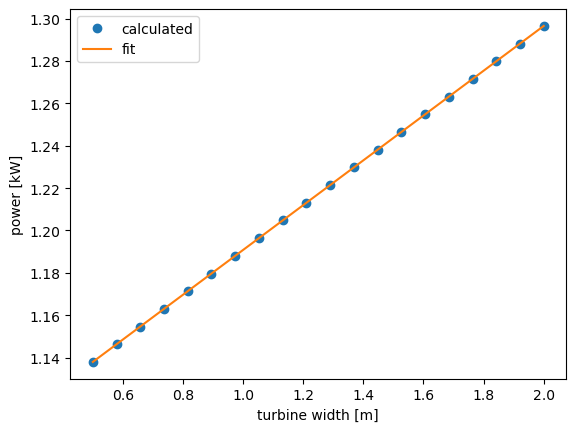

In [10]:
# turbine width sensitivity analysis

# create a list of turbine widths
widths = np.linspace(0.5, 2, 20)

# create a list of power values
power = []

# loop through the turbine widths and calculate the power for each
for width in widths:
    breast_turbine.__init__(river, width=width, num_blades=6, x_centre=1, y_centre=-0.1)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs turbine width
plt.figure()
plt.plot(widths, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(widths), np.poly1d(np.polyfit(widths, power, 2))(np.unique(widths)), label='fit')

plt.xlabel('turbine width [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()



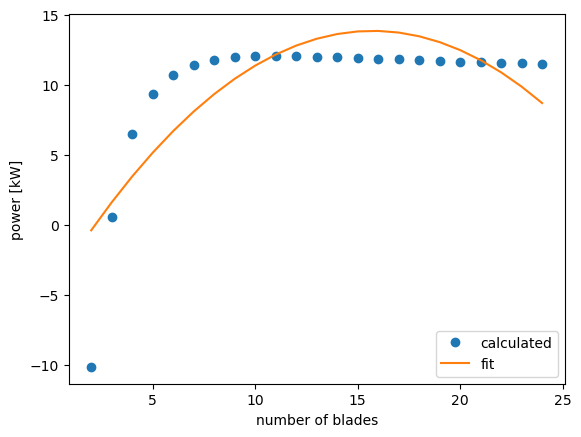

In [11]:
# undershot wheel sensitivity analysis

# initialise the turbine
under_turbine = underTurbine(river)

# number of blades
blades = range(2, 25)

# create a list of power values
power = []

# loop through the number of blades and calculate the power for each
for blade in blades:
    under_turbine.__init__(river, num_blades=blade)
    power.append(under_turbine.analysis()/1000)

# plot the power vs number of blades
plt.figure()
plt.plot(blades, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(blades), np.poly1d(np.polyfit(blades, power, 2))(np.unique(blades)), label='fit')

plt.xlabel('number of blades')
plt.ylabel('power [kW]')
plt.legend()
plt.show()



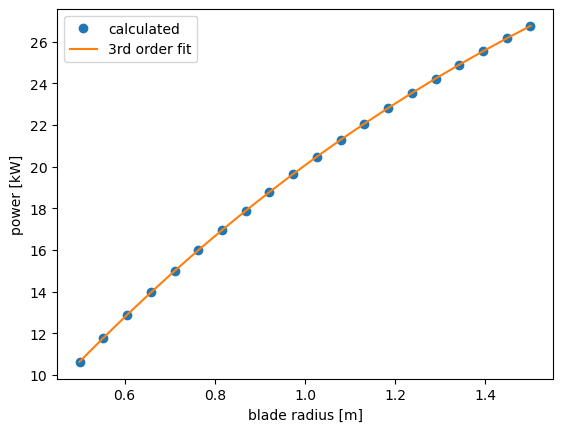

In [12]:
# radius sensitivity analysis

# create a list of blade radii
radii = np.linspace(0.5, 1.5, 20)

# create a list of power values
power = []

# loop through the radii and calculate the power for each
for radius in radii:
    under_turbine.__init__(river, radius=radius)
    power.append(under_turbine.analysis()/1000)

# plot the power vs blade radius
plt.figure()
plt.plot(radii, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(radii), np.poly1d(np.polyfit(radii, power, 3))(np.unique(radii)), label='3rd order fit')

plt.xlabel('blade radius [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


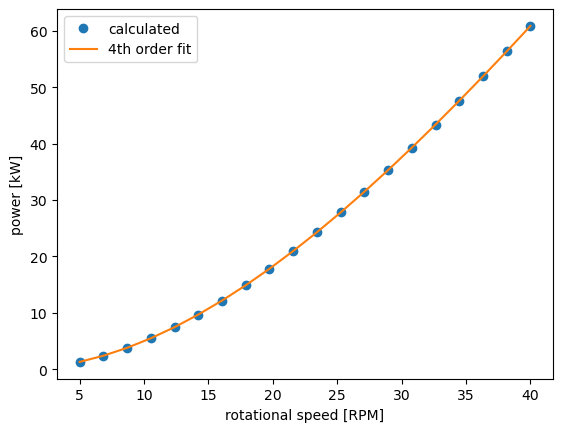

In [13]:
# RPM sensitivity analysis

# create a list of rotational speeds
speeds = np.linspace(5, 40, 20)

# create a list of power values
power = []

# loop through the rotational speeds and calculate the power for each
for speed in speeds:
    under_turbine.__init__(river, RPM=speed)
    power.append(under_turbine.analysis()/1000)

# plot the power vs rotational speed
plt.figure()
plt.plot(speeds, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(speeds), np.poly1d(np.polyfit(speeds, power, 4))(np.unique(speeds)), label='4th order fit')

plt.xlabel('rotational speed [RPM]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()



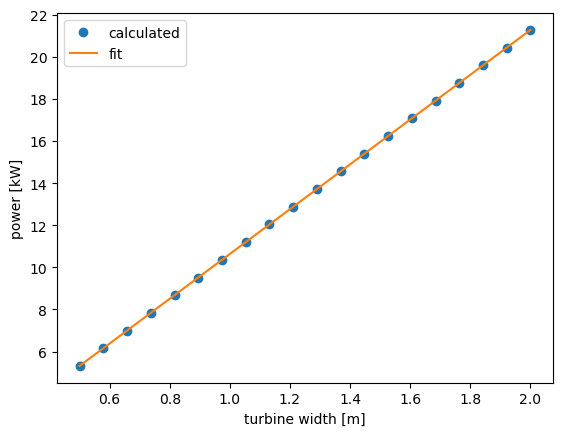

In [14]:
# width sensitivity analysis

# create a list of turbine widths
widths = np.linspace(0.5, 2, 20)

# create a list of power values
power = []

# loop through the turbine widths and calculate the power for each
for width in widths:
    under_turbine.__init__(river, width=width)
    power.append(under_turbine.analysis()/1000)

# plot the power vs turbine width
plt.figure()
plt.plot(widths, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(widths), np.poly1d(np.polyfit(widths, power, 1))(np.unique(widths)), label='fit')

plt.xlabel('turbine width [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


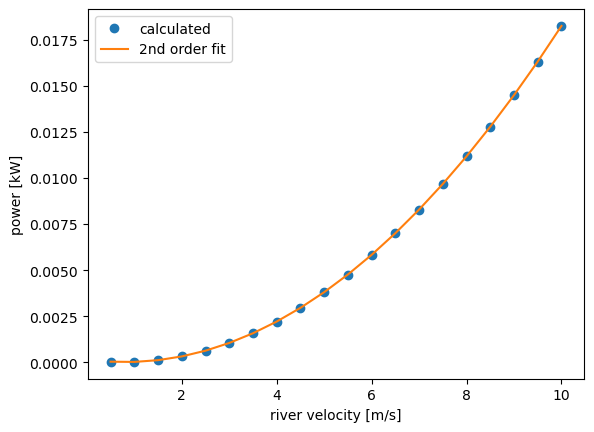

In [15]:
# varying the river velocity sensitivity analysis

# create a list of river velocities
velocities = np.linspace(0.5, 10, 20)

# create a list of power values
power = []

# loop through the river velocities and calculate the power for each
for velocity in velocities:
    river.__init__(width=r_width, depth=r_depth, velocity=velocity)
    under_turbine.__init__(river, RPM=20)
    power.append(under_turbine.analysis()/1000**2)

# plot the power vs river velocity
plt.figure()
plt.plot(velocities, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(velocities), np.poly1d(np.polyfit(velocities, power, 2))(np.unique(velocities)), label='2nd order fit')

plt.xlabel('river velocity [m/s]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()




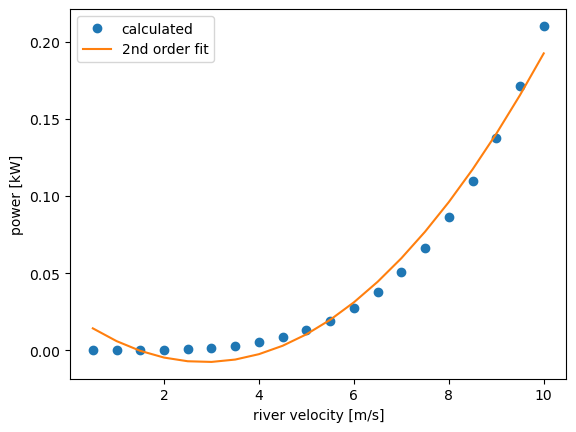

In [16]:
# if the rpm is given as v = omega * r, then the rpm can be calculated as follows:

# create a river velocities
velocities = np.linspace(0.5, 10, 20)

def rpm(v):
    return v * 60 / (2 * np.pi * 0.504)

# create a list of power values
power = []

# loop through the river velocities and calculate the power for each
for velocity in velocities:
    river.__init__(width=r_width, depth=r_depth, velocity=velocity)
    under_turbine.__init__(river, RPM=rpm(velocity))
    power.append(under_turbine.analysis()/1000**2)

# plot the power vs river velocity
plt.figure()
plt.plot(velocities, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(velocities), np.poly1d(np.polyfit(velocities, power, 2))(np.unique(velocities)), label='2nd order fit')

plt.xlabel('river velocity [m/s]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()
